In [1]:
import pandas as pd
import numpy as np

# Import Data, Which will be backgrownTrain always

In [7]:
df = pd.read_csv('backgrownTrain.csv') 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Keras import(s)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape, Conv2D, Conv2DTranspose, Concatenate, Lambda,BatchNormalization, UpSampling2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.backend import set_image_data_format
from keras.optimizers import Adam
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
set_image_data_format('channels_last')  # Images are formatted as (N, N, 1), with colour-channels last

# Following are functions to make encoder and decoders

In [4]:
def build_encoder_model(shape, latent_dim, dense_layers):
    i = Input(shape, name='input')
    x = i
    for neurons in dense_layers:
        x = Dense(neurons, activation='relu')(x)
    e = Dense(latent_dim, activation='relu')(x)
    encoder = Model(i, e, name='encoder')
    return encoder

In [5]:
def build_decoder_model(latent_dim, shape, dense_layers):
    t = Input(shape=(latent_dim,), name='decoder_input')
    x = t
    for neurons in dense_layers:
        x = Dense(neurons, activation='relu')(x)
    o = Dense(shape[0], activation='relu')(x)
    decoder = Model(t, o, name='decoder')
    return decoder

# Following is a modular cell, which can be readily changed to make different model

In [32]:
input_shape = df.shape[1:]
latent_dim = 30   #Latent space dimention

dense_layers_encoder=[256,512,512,512,256,120,50]   #Numbers of dence layers used in encoder

dense_layers_decoder = [50,120,256,512,512,512,256]   #Numbers of dence layers used in decoder

In Every Model I used encoder and decoder are symetric

In [33]:
encoder = build_encoder_model(input_shape, latent_dim, dense_layers_encoder)
decoder = build_decoder_model(latent_dim, input_shape, dense_layers_decoder)

inputs = Input(shape=input_shape, name='encoder_input')
latent_vector = encoder(inputs)
reconstructed = decoder(latent_vector)

vae = Model(inputs, reconstructed, name='vae')

In [34]:
vae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 39)]              0         
                                                                 
 encoder (Functional)        (None, 30)                836884    
                                                                 
 decoder (Functional)        (None, 39)                836893    
                                                                 
Total params: 1,673,777
Trainable params: 1,673,777
Non-trainable params: 0
_________________________________________________________________


# Traning Model

I trained almost all model by minimising mean square error i and adams optimiser, Because almost It gives me better result in initial brainstroming sessions.

In [35]:
# Define parameters
nb_epochs  =  150    #every model is trained for 50-150 epocs.
batch_size = 500   #tried, 200 and 2000 also, But 500 seems better middle ground.

In [36]:
MSE='mean_squared_error'
BCE='binary_crossentropy'

In [37]:
vae.compile(optimizer='adam', loss=MSE, metrics=['MSE'])

In [38]:
history=vae.fit(df,df,epochs=nb_epochs, batch_size=batch_size,  validation_split=0.2)

Train on 190549 samples, validate on 47638 samples
Epoch 1/150
190549/190549 [==============================] - 24s 126us/sample - loss: 0.0431 - MSE: 0.0431 - val_loss: 0.0216 - val_MSE: 0.0216
Epoch 2/150
190549/190549 [==============================] - 24s 124us/sample - loss: 0.0160 - MSE: 0.0160 - val_loss: 0.0121 - val_MSE: 0.0121
Epoch 3/150
190549/190549 [==============================] - 24s 125us/sample - loss: 0.0097 - MSE: 0.0097 - val_loss: 0.0086 - val_MSE: 0.0086
Epoch 4/150
190549/190549 [==============================] - 23s 122us/sample - loss: 0.0075 - MSE: 0.0075 - val_loss: 0.0069 - val_MSE: 0.0069
Epoch 5/150
190549/190549 [==============================] - 27s 141us/sample - loss: 0.0060 - MSE: 0.0060 - val_loss: 0.0056 - val_MSE: 0.0056
Epoch 6/150
190549/190549 [==============================] - 26s 135us/sample - loss: 0.0047 - MSE: 0.0047 - val_loss: 0.0046 - val_MSE: 0.0046
Epoch 7/150
190549/190549 [==============================] - 27s 139us/sample - loss:

KeyboardInterrupt: 

In [40]:
vae.evaluate(x_test,x_test) #checking performance on test data

NameError: name 'x_test' is not defined

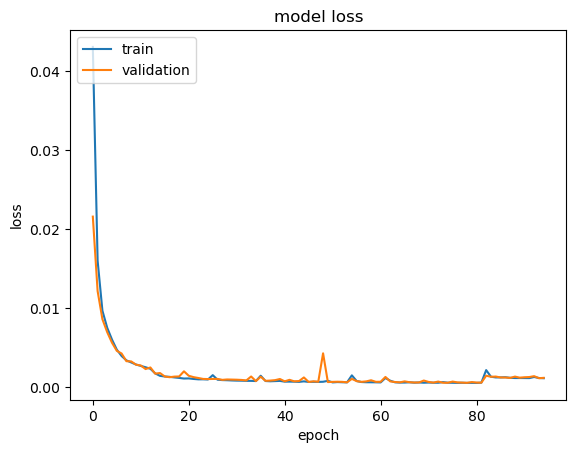

In [39]:
#checking loss as a function of epocs, Not very helpful in our analysis, as we are intrusted in anomly detection
plt.plot(vae.history.history['loss'])
plt.plot(vae.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


plt.show()

In [41]:
vae.save('l30_1.6m.h5')#saving trained model